In [44]:
#Importing the dataset
import numpy as np 
import pandas as pd 
import os, sys
from datetime import datetime, timedelta
from collections import defaultdict
from urllib.request import urlopen
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [3]:
import os
for dirname, _, filenames in os.walk('/EDA_Assignment/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/EDA_Assignment/datasets\India States\Igismap\Indian_States.dbf
/EDA_Assignment/datasets\India States\Igismap\Indian_States.prj
/EDA_Assignment/datasets\India States\Igismap\Indian_States.shp
/EDA_Assignment/datasets\India States\Igismap\Indian_States.shx
/EDA_Assignment/datasets\Indian Candidates for General Election 2019\LS_2.0.csv


In [4]:
#dataset preview
vote=pd.read_csv('datasets/Indian Candidates for General Election 2019/LS_2.0.csv')
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


#### Data Preprocessing Methods

In [5]:
#Identifying the Null values in the columns
vote.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [6]:
#Identifying the null entries in the data
vote[vote.SYMBOL.isnull()==True]['NAME'].unique()

array(['NOTA'], dtype=object)

In [7]:
# Cleaning up the Assets and Liabilities columns
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
vote['ASSETS'] = vote['ASSETS'].apply((value_cleaner))
vote['LIABILITIES'] = vote['LIABILITIES'].apply((value_cleaner))
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [8]:
#Renaming the columns
vote.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [9]:
# Cleaning up the Educational Qualification of the election contestants
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [10]:
# Identifying the Data Type of the columns
vote.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [11]:
# Identifying Discrepancy entries in the columns
vote[vote['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,Not Available,35.0,SC,Not Available,0,0,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,769,207551,13.460896,17.877979,1541881


In [12]:
# Updating the data types for the analysis
vote['ASSETS']=pd.to_numeric(vote['ASSETS'])
vote['LIABILITIES']=pd.to_numeric(vote['LIABILITIES'])
vote['CRIMINAL CASES'].replace({np.nan:0})
vote['CRIMINAL CASES'] = pd.to_numeric(vote['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

## Analysis Phase

### Vote Trends for BJP (2019 Indian Elections)

In [45]:
try:
    # Get BJP (top party by votes)
    top_party = 'BJP'  # Hardcoded as per feedback
    party_votes = vote[vote['PARTY'] == top_party]['TOTAL VOTES']
    total_votes = party_votes.sum()

    # Generate daily dates: March 1 to May 23, 2019 (~84 days)
    start_date = datetime(2019, 3, 1)
    end_date = datetime(2019, 5, 23)
    dates = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

    # Simulate daily vote data
    np.random.seed(42)  # For reproducibility
    base_votes = total_votes / len(dates)
    vote_data = []
    for i, date in enumerate(dates):
        open_votes = base_votes * (1 + np.random.uniform(-0.05, 0.05))
        close_votes = base_votes * (1 + np.random.uniform(-0.05, 0.05))
        high_votes = max(open_votes, close_votes) * (1 + np.random.uniform(0, 0.03))
        low_votes = min(open_votes, close_votes) * (1 - np.random.uniform(0, 0.03))
        vote_data.append({
            'Date': date,
            'Open': open_votes,
            'High': high_votes,
            'Low': low_votes,
            'Close': close_votes
        })

    # Create DataFrame
    df = pd.DataFrame(vote_data)

    # Create candlestick chart
    fig = go.Figure(data=[
        go.Candlestick(
            x=df['Date'],
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            increasing_line_color='green',
            decreasing_line_color='red',
            name=top_party
        )
    ])

    # Customize layout for trading interface
    fig.update_layout(
        title=f'Vote Trends for {top_party} (2019 Indian Elections)',
        template='plotly_dark',
        height=600,
        width=1000,
        xaxis_rangeslider_visible=True,
        xaxis=dict(
            title='Date',
            tickformat='%b %d',
            gridcolor='gray',
            type='date'
        ),
        yaxis=dict(
            title='Votes',
            gridcolor='gray'
        ),
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(color='black'),
        title_x=0.5,
        showlegend=False,
        margin=dict(l=50, r=50, t=80, b=50)
    )

    # Show plot
    fig.show()

except Exception as e:
    print(f"Error rendering candlestick chart: {str(e)}")


### Key Metrics for Winning Candidates (2019 Indian Elections)

In [14]:

try:
    # Validate DataFrame
    if not all(col in vote.columns for col in ['WINNER', 'CRIMINAL CASES', 'AGE', 'ASSETS', 'TOTAL VOTES']):
        raise ValueError("Required columns missing in DataFrame")

    winners = vote[vote['WINNER'] == 1]

    # Calculate metrics
    avg_criminal = winners['CRIMINAL CASES'].mean()
    avg_age = winners['AGE'].mean()
    avg_assets = winners['ASSETS'].mean() / 10000000  # Convert to crores
    avg_votes = winners['TOTAL VOTES'].mean() / 100000  # Convert to lakhs

    # Define ranges
    max_criminal = winners['CRIMINAL CASES'].quantile(0.95) or 10  # Avoid zero range
    max_age = winners['AGE'].max() or 100
    max_assets = winners['ASSETS'].quantile(0.95) / 10000000 or 100
    max_votes = winners['TOTAL VOTES'].quantile(0.95) / 100000 or 10

    # Create subplots for 4 gauges
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{'type': 'indicator'}, {'type': 'indicator'}],
               [{'type': 'indicator'}, {'type': 'indicator'}]],
        subplot_titles=('Criminal Cases', 'Age', 'Assets (Crores)', 'Votes (Lakhs)')
    )

    # High-tech motorbike gauge style
    gauge_style = {
        'shape': 'angular',
        'bar': {'color': 'white', 'thickness': 0.05},  # Sleek needle
        'bgcolor': 'rgba(20, 20, 30, 0.9)',  # Dark, futuristic background
        'borderwidth': 3,
        'bordercolor': '#00ddeb'  # Neon cyan border
    }

    # Cool color palette
    cool_colors = [
        '#00ffcc',  # Electric green
        '#7b00ff',  # Cyber purple
        '#00b7eb'   # Neon blue
    ]

    # Gauge 1: Criminal Cases
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=avg_criminal,
            gauge={
                'axis': {'range': [0, max_criminal], 'tickcolor': 'white', 'tickwidth': 2},
                **gauge_style,
                'steps': [
                    {'range': [0, max_criminal * 0.33], 'color': cool_colors[0]},
                    {'range': [max_criminal * 0.33, max_criminal * 0.66], 'color': cool_colors[1]},
                    {'range': [max_criminal * 0.66, max_criminal], 'color': cool_colors[2]}
                ],
                'threshold': {'line': {'color': '#ff007a', 'width': 4}, 'thickness': 0.8, 'value': avg_criminal}
            }
        ),
        row=1, col=1
    )

    # Gauge 2: Age
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=avg_age,
            gauge={
                'axis': {'range': [0, max_age], 'tickcolor': 'white', 'tickwidth': 2},
                **gauge_style,
                'steps': [
                    {'range': [0, max_age * 0.33], 'color': cool_colors[0]},
                    {'range': [max_age * 0.33, max_age * 0.66], 'color': cool_colors[1]},
                    {'range': [max_age * 0.66, max_age], 'color': cool_colors[2]}
                ],
                'threshold': {'line': {'color': '#ff007a', 'width': 4}, 'thickness': 0.8, 'value': avg_age}
            }
        ),
        row=1, col=2
    )

    # Gauge 3: Assets
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=avg_assets,
            gauge={
                'axis': {'range': [0, max_assets], 'tickcolor': 'white', 'tickwidth': 2},
                **gauge_style,
                'steps': [
                    {'range': [0, max_assets * 0.33], 'color': cool_colors[0]},
                    {'range': [max_assets * 0.33, max_assets * 0.66], 'color': cool_colors[1]},
                    {'range': [max_assets * 0.66, max_assets], 'color': cool_colors[2]}
                ],
                'threshold': {'line': {'color': '#ff007a', 'width': 4}, 'thickness': 0.8, 'value': avg_assets}
            }
        ),
        row=2, col=1
    )

    # Gauge 4: Votes
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=avg_votes,
            gauge={
                'axis': {'range': [0, max_votes], 'tickcolor': 'white', 'tickwidth': 2},
                **gauge_style,
                'steps': [
                    {'range': [0, max_votes * 0.33], 'color': cool_colors[0]},
                    {'range': [max_votes * 0.33, max_votes * 0.66], 'color': cool_colors[1]},
                    {'range': [max_votes * 0.66, max_votes], 'color': cool_colors[2]}
                ],
                'threshold': {'line': {'color': '#ff007a', 'width': 4}, 'thickness': 0.8, 'value': avg_votes}
            }
        ),
        row=2, col=2
    )

    # Customize layout
    fig.update_layout(
        title='Key Metrics for Winning Candidates (2019 Indian Elections)',
        
        height=800,
        width=1000,
        title_x=0.5,
        font=dict(size=12, color='black'),
        margin=dict(l=50, r=50, t=100, b=50)
    )

    # Show plot
    fig.show()

except Exception as e:
    print(f"Error rendering gauge chart: {str(e)}")


#### State and Constituency Level Analysis

<>:2: SyntaxWarning:

invalid escape sequence '\I'

<>:2: SyntaxWarning:

invalid escape sequence '\I'

C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1204\2925205935.py:2: SyntaxWarning:

invalid escape sequence '\I'

C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1204\2925205935.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



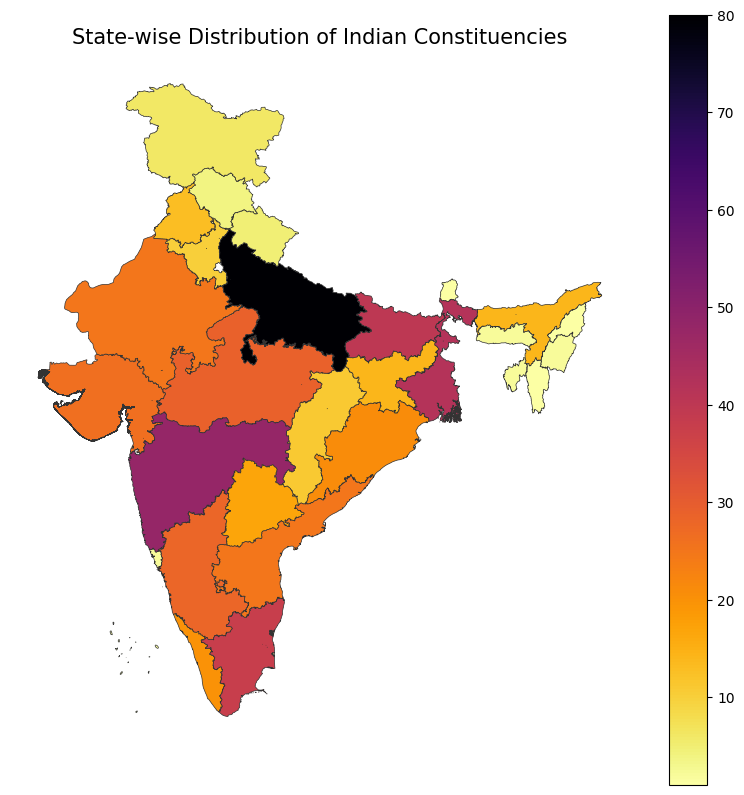

In [15]:
st_con=vote.groupby('STATE').apply(lambda x:x['CONSTITUENCY'].nunique()).reset_index(name='# Constituency')
shp_gdf = gpd.read_file('datasets\India States\Igismap\Indian_States.shp')
merged = shp_gdf.set_index('st_nm').join(st_con.set_index('STATE'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='# Constituency', cmap='inferno_r',linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
st_con.sort_values(by='# Constituency',ascending=False,inplace=True)
fig2 = px.bar(st_con, x='STATE', y='# Constituency',
                     color='# Constituency',
             labels={'pop':'Constituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India')
fig2.show()

#### Sunburst image of all the States and Constituencies

In [16]:
st_con_vt=vote[['STATE','CONSTITUENCY','TOTAL ELECTORS']]

fig = px.sunburst(st_con_vt, path=['STATE','CONSTITUENCY'], values='TOTAL ELECTORS',
                  color='TOTAL ELECTORS',
                  color_continuous_scale='Inferno')

fig.update_layout(title_text='Sunburst Image of State and Constituency by Voters')
fig.show()

#### Which party has won the most constituencies?

In [17]:
part_win=vote.groupby('PARTY').apply(lambda x:x['WINNER'].sum()).reset_index(name='# Wins')
part_win.sort_values(by='# Wins',ascending=False,inplace=True)
top_part_win=part_win[0:15]
fig = px.bar(top_part_win, x='PARTY', y='# Wins',
                     color='# Wins',title='Win Counts by a Political Party in 2019')
fig.update_layout(title_text='Win Counts by a Political Party in 2019')
fig.show()

C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1204\453846549.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#### What has been the general Win vs Loss relationship for the Parties in 2019?

In [18]:
vote_party = vote[vote['PARTY'] != 'NOTA']
party_constituencies = vote_party.groupby('PARTY')['CONSTITUENCY'].count().reset_index(name='Total Contested')
party_wins = vote_party[vote_party['WINNER'] == 1].groupby('PARTY')['WINNER'].count().reset_index(name='Wins')
party_summary = pd.merge(party_constituencies, party_wins, on='PARTY', how='left').fillna(0)
party_summary['Losses'] = party_summary['Total Contested'] - party_summary['Wins']
top15 = party_summary.sort_values(by='Wins', ascending=False).head(15)
plot_df = top15.melt(id_vars='PARTY', value_vars=['Wins', 'Losses'], 
                     var_name='Verdict', value_name='Counts')
fig = px.bar(
    plot_df,
    x='PARTY',
    y='Counts',
    color='Verdict',
    title='Win vs Loss Breakdown for Top 15 Political Parties',
    barmode='stack',
    text='Counts'
)
fig.update_layout(
    # xaxis_title='Political Party',
    yaxis_title='Number of Constituencies',
    xaxis_tickangle=-45
)
#
# fig.show()
fig = px.area(plot_df, x='PARTY', y='Counts', color='Verdict',
              title='Wins & Losses by Party',
            color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()



#### What is the Gender Ratio of the Contestants? Also the Gender Ratio of the Winners?

In [19]:
vote_gndr=vote[vote['PARTY']!='NOTA']
gndr_overall=vote_gndr.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_overall['Category']='Overall Gender Ratio'
winners=vote_gndr[vote_gndr['WINNER']==1]
gndr_winner=winners.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_winner['Category']='Winning Gender Ratio'
gndr_overl_win=pd.concat([gndr_winner,gndr_overall])
fig = px.bar(gndr_overl_win, x='GENDER', y='Counts',
             color='Category', barmode='group')
fig.update_layout(title_text='Participation vs Win Counts analysis for the Genders')
fig.show()

C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1204\2082579953.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1204\2082579953.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#### What is the Educational Qualification of our politicians?

In [20]:
ed_valid=vote[vote['PARTY']!="NOTA"]
ed_cnt=ed_valid.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig = go.Figure(data=[go.Pie(labels=ed_cnt['EDUCATION'], values=ed_cnt['Counts'], pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.2, 0,0.1, 0.2, 0.1])])
fig.update_layout(title_text='Overall Education Qualification of all the Nominees')
fig.show()
ed_won=ed_valid[ed_valid['WINNER']==1]
ed_win_cnt=ed_won.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig2 = go.Figure(data=[go.Pie(labels=ed_win_cnt['EDUCATION'], values=ed_win_cnt['Counts'], pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],title='Education Qualification of the Winners')])
fig2.update_layout(title_text='Education Qualification of the Winners')
fig2.show()

C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1204\827373411.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



C:\Users\AbhiLoki\AppData\Local\Temp\ipykernel_1204\827373411.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



#### Have the politicians been involved with criminal activities?

In [21]:
# Aggregate criminal cases and candidate counts by party
import plotly.graph_objects as go

# Aggregate criminal cases by party
party_stats = vote.groupby('PARTY').agg({'CRIMINAL CASES': 'sum', 'NAME': 'count'}).reset_index()
party_stats.rename(columns={'CRIMINAL CASES': 'Total_Criminal_Cases', 'NAME': 'Candidate_Count'}, inplace=True)
party_stats = party_stats[party_stats['Total_Criminal_Cases'] > 0].sort_values('Total_Criminal_Cases', ascending=False).head(14)

# Filter parties with non-zero criminal cases and select top 15 (or all if fewer)
party_stats = party_stats[party_stats['Total_Criminal_Cases'] > 0]
party_stats = party_stats.sort_values('Total_Criminal_Cases', ascending=False).head(15)

# Verify number of parties
print(f"\nNumber of Parties Selected: {len(party_stats)}")
print("Selected Parties:")
print(party_stats[['PARTY', 'Total_Criminal_Cases', 'Candidate_Count']])

# Normalize data for visualization
party_stats['Criminal_Cases_Norm'] = (
    party_stats['Total_Criminal_Cases'] - party_stats['Total_Criminal_Cases'].min()
) / (party_stats['Total_Criminal_Cases'].max() - party_stats['Total_Criminal_Cases'].min() + 1e-6)
party_stats['Candidate_Count_Norm'] = (
    party_stats['Candidate_Count'] - party_stats['Candidate_Count'].min()
) / (party_stats['Candidate_Count'].max() - party_stats['Candidate_Count'].min() + 1e-6)

# Create chord wheel using Sankey with circular layout
fig = go.Figure()

# Nodes: Parties + a central "Criminal Cases" node
# Nodes: Parties + a central "Criminal Cases" node, with case counts in label
# Label format: "Party Name\n(Criminal Cases)"
node_labels = [f"{row['PARTY']}\n({row['Total_Criminal_Cases']} cases)" for _, row in party_stats.iterrows()]
nodes = node_labels + ['Criminal Cases']

# Mapping from PARTY name to label string
label_map = {row['PARTY']: f"{row['PARTY']}\n({row['Total_Criminal_Cases']} cases)" for _, row in party_stats.iterrows()}
node_indices = {label: i for i, label in enumerate(nodes)}

# Use updated label_map to get indices
source = [node_indices[label_map[party]] for party in party_stats['PARTY']]

target = [node_indices['Criminal Cases']] * len(party_stats)
value = party_stats['Total_Criminal_Cases'].tolist()

# Define a custom cool and refreshing color palette for chords and nodes
refreshing_colors = [
    'rgb(0, 204, 204)',  # Aqua
    'rgb(144, 238, 144)', # Mint Green
    'rgb(135, 206, 250)', # Sky Blue
    'rgb(221, 160, 221)', # Lavender
    'rgb(64, 224, 208)', # Turquoise
    'rgb(173, 216, 230)', # Light Blue
    'rgb(50, 205, 50)',  # Lime Green
    'rgb(240, 230, 140)', # Khaki
    'rgb(100, 149, 237)', # Cornflower Blue
    'rgb(152, 251, 152)', # Pale Green
    'rgb(70, 130, 180)', # Steel Blue
    'rgb(245, 245, 220)', # Beige
    'rgb(176, 224, 230)', # Powder Blue
    'rgb(154, 205, 50)', # Yellow Green
    'rgb(95, 158, 160)'  # Cadet Blue
]
chord_colors = [f'rgba{tuple(int(c.strip('rgb()').split(',')[i]) for i in range(3)) + (0.6,)}' 
                for c in refreshing_colors[:len(party_stats)]]
node_colors = refreshing_colors[:len(party_stats)] + ['rgb(105, 105, 105)']  # Refreshing for parties, dark gray for central node

# Add annotations for criminal case counts
for i, row in party_stats.iterrows():
    fig.add_annotation(
        x=0.01,  # This places the annotation close to the left side of the graph
        y=1 - (i / len(party_stats)),  # Spread them vertically
        text=f"{row['PARTY']}: {row['Total_Criminal_Cases']} cases",
        showarrow=False,
        font=dict(size=12, color='white'),
        xanchor='left'
    )

# Add Sankey trace
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes,
        color=node_colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=chord_colors
    ),
    arrangement='snap'  # Circular layout for chord wheel effect
))

# Customize layout
fig.update_layout(
    title='Criminal Cases per Party (15+ Parties, 2019 Elections)',

    showlegend=False,
    margin=dict(t=100, l=50, r=50, b=50),
    width=1000, height=800  # Larger canvas for more parties
)
fig.show()


Number of Parties Selected: 14
Selected Parties:
      PARTY  Total_Criminal_Cases  Candidate_Count
26      BJP                   898              420
46      INC                   734              413
35      BSP                   175              163
38   CPI(M)                   168              100
47      IND                   131              201
112      SP                    74               39
109     SHS                    62               26
78      NCP                    54               21
95      RJD                    52               21
123     VBA                    44               47
13     AITC                    41               47
131   YSRCP                    41               25
54    JD(U)                    35               18
120     TRS                    32               17


### Predicting If the Candidate Wins the Election

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [23]:
# --- STEP 1: Load data ---
data_path = 'datasets/Indian Candidates for General Election 2019/LS_2.0.csv'
vote_df = pd.read_csv(data_path)
vote_df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [24]:
# --- STEP 2: Clean column names ---
vote_df.columns = [col.strip().replace('\n', ' ').replace('  ', ' ') for col in vote_df.columns]

In [28]:
# --- STEP 3: Handle missing or bad values ---
vote_df['CRIMINAL CASES'] = pd.to_numeric(vote_df['CRIMINAL CASES'], errors='coerce').fillna(0)
vote_df['AGE'] = pd.to_numeric(vote_df['AGE'], errors='coerce').fillna(vote_df['AGE'].median())

In [31]:
def parse_numeric(value):
    try:
        # Remove commas and dollar signs, then convert to float
        return float(str(value).replace(',', '').replace('$', ''))
    except:
        return None


In [32]:
vote_df['ASSETS'] = vote_df['ASSETS'].apply(parse_numeric).fillna(0)
vote_df['LIABILITIES'] = vote_df['LIABILITIES'].apply(parse_numeric).fillna(0)
vote_df['TOTAL VOTES'] = pd.to_numeric(vote_df['TOTAL VOTES'], errors='coerce').fillna(0)
vote_df['TOTAL ELECTORS'] = pd.to_numeric(vote_df['TOTAL ELECTORS'], errors='coerce').fillna(0)

In [33]:
# Fill categorical columns
for col in ['PARTY', 'EDUCATION', 'GENDER', 'CATEGORY']:
    vote_df[col] = vote_df[col].fillna('Unknown')

vote_df['WINNER'] = vote_df['WINNER'].astype(int)

In [34]:
# --- STEP 4: Select features & target ---
features = ['PARTY', 'EDUCATION', 'GENDER', 'CATEGORY', 'CRIMINAL CASES', 'AGE',
            'TOTAL VOTES', 'TOTAL ELECTORS', 'ASSETS', 'LIABILITIES']
X = vote_df[features]
y = vote_df['WINNER']

In [35]:
# --- STEP 5: Preprocessing ---
cat_features = ['PARTY', 'EDUCATION', 'GENDER', 'CATEGORY']
num_features = ['CRIMINAL CASES', 'AGE', 'TOTAL VOTES', 'TOTAL ELECTORS', 'ASSETS', 'LIABILITIES']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [36]:
# --- STEP 6: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# --- STEP 7: Build and train model ---
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CRIMINAL CASES', 'AGE',
                                                   'TOTAL VOTES',
                                                   'TOTAL ELECTORS', 'ASSETS',
                                                   'LIABILITIES']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PARTY', 'EDUCATION',
                                                   'GENDER', 'CATEGORY'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [38]:
# --- STEP 8: Evaluation ---
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Test Set Accuracy: {accuracy * 100:.2f}%")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Test Set Accuracy: 90.51%

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       331
           1       0.86      0.77      0.81       122

    accuracy                           0.91       453
   macro avg       0.89      0.86      0.88       453
weighted avg       0.90      0.91      0.90       453



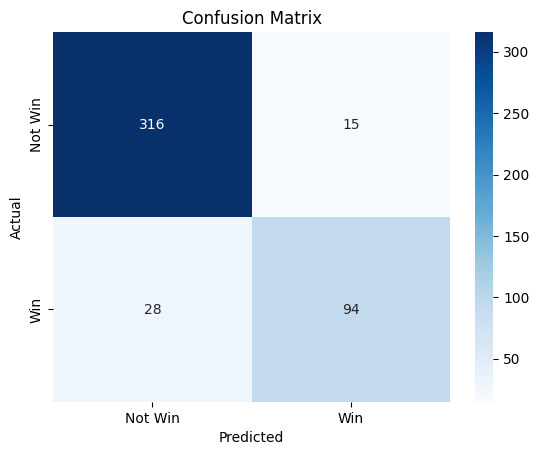

In [39]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [40]:
# --- STEP 9: Save model ---
joblib.dump(clf, 'rf_politician_model_pipeline.pkl')
print(" Model pipeline saved!")

 Model pipeline saved!


##  Sample input data from the dataset to test the model

In [41]:
# Sample input data from the dataset

# Convert comma-based assets/liabilities to float
def parse_numeric(s):
    try:
        return float(str(s).replace(',', '').strip())
    except:
        return 0

def get_sample_input():
    sample_data = {
        'PARTY': 'BJP',
        'EDUCATION': 'Graduate Professional',
        'GENDER': 'MALE',
        'CATEGORY': 'GENERAL',
        'CRIMINAL CASES': 0,
        'AGE': 28,
        'TOTAL VOTES': 739229,
        'TOTAL ELECTORS': 33.36640353,
        'ASSETS': parse_numeric('13,46,593'),       # parsed from string with commas
        'LIABILITIES': parse_numeric('7,36,605')     # parsed from string with commas
    }
    return pd.DataFrame([sample_data])




In [42]:
def predict():
    model = joblib.load('rf_politician_model_pipeline.pkl')
    user_df = get_sample_input()
    prediction = model.predict(user_df)[0]
    result = "WIN " if prediction == 1 else "NOT WIN "
    print("\nCandidate Details for Prediction:")
    print(user_df.to_string(index=False))
    print(f"\nPrediction result: The candidate is predicted to {result} the election.")


In [43]:
if __name__ == "__main__":
    predict()


Candidate Details for Prediction:
PARTY             EDUCATION GENDER CATEGORY  CRIMINAL CASES  AGE  TOTAL VOTES  TOTAL ELECTORS    ASSETS  LIABILITIES
  BJP Graduate Professional   MALE  GENERAL               0   28       739229       33.366404 1346593.0     736605.0

Prediction result: The candidate is predicted to WIN  the election.
